In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load Dataset
data_path = r"C:\Users\karkw\Downloads\Data Analyst Assignment_Bitla Software.csv"
df = pd.read_csv(data_path)

In [35]:
df.head()

,DOI,DOJ,DOC,PNR,PG Name,Booking Source,Bookings Status,Customer Name,Bus Operator Name,Travel Ref Code,Bus Type,No Of Seats,Fare,Disc,Origin,Destination,Total Fare,Seat Occupancy
0,14-10-2024,14-10-2024,NaN,180679,PAYTM,Mobweb,Confirmed,Hirdesh Raghuvanshi,Bus Operator 1,TS-A11967,"2+1, Sleeper/Seater,AC, Non-Video (40 seats)",2,1600.0,0.0,Jaipur,Bhopal,1600.0,0.50
1,07-11-2024,08-11-2024,NaN,182850,PAYTM,Mobweb,Confirmed,Mahesh Chabarwal,Bus Operator 1,TS-A11967,"2+1, Sleeper/Seater,Non-AC, Non-Video (41 seats)",1,800.0,0.0,Jaipur,Bhopal,800.0,0.25
2,09-11-2024,10-11-2024,NaN,183127,PAYTM,Mobweb,Confirmed,Ranveer Singh Rajawat,Bus Operator 1,TS-A11967,"2+1, Sleeper/Seater,AC, Non-Video (42 seats)",1,601.0,0.0,Delhi,Jaipur,601.0,0.25
3,25-10-2024,06-11-2024,NaN,82843,PAYTM,Web,Confirmed,Aftab Mirza,Bus Operator 10,TS-A13303,"2+1, Sleeper,Non-AC (30 seats)",1,1600.0,0.0,Kalyan,Mehkar,1600.0,0.25
4,28-10-2024,30-10-2024,NaN,82976,PAYTM,Web,Confirmed,Mirza Abid Raza,Bus Operator 10,TS-A13303,"2+1, Sleeper,Non-AC (30 seats)",1,2500.0,0.0,Kalyan,Mehkar,2500.0,0.25


In [22]:

df['Total Fare'] = df['Fare'] - df['Disc']
print(df)

            DOI         DOJ         DOC         PNR    PG Name Booking Source  \
0    14-10-2024  14-10-2024         NaN      180679      PAYTM         Mobweb   
1    07-11-2024  08-11-2024         NaN      182850      PAYTM         Mobweb   
2    09-11-2024  10-11-2024         NaN      183127      PAYTM         Mobweb   
3    25-10-2024  06-11-2024         NaN       82843      PAYTM            Web   
4    28-10-2024  30-10-2024         NaN       82976      PAYTM            Web   
5    14-11-2024  14-11-2024         NaN       83799      PAYTM         Mobweb   
6    01-10-2024  01-10-2024         NaN  AEXP149939      PAYTM         Mobweb   
7    03-10-2024  03-10-2024         NaN  AEXP150173      PAYTM         Mobweb   
8    04-10-2024  09-10-2024         NaN  AEXP150291  CC_AVENUE         Mobweb   
9    04-10-2024  04-10-2024         NaN  AEXP150343      PAYTM         Mobweb   
10   05-10-2024  10-10-2024         NaN  AEXP150412  CC_AVENUE         Mobweb   
11   27-10-2024  29-10-2024 

In [23]:
# Most Frequent Routes
route_counts = df.groupby(['Origin', 'Destination']).size().reset_index(name='Count')
most_frequent_routes = route_counts.sort_values(by='Count', ascending=False).head(10)
print(most_frequent_routes)

        Origin  Destination  Count
70   Mangalore    Bangalore     33
28     Chennai   Dharmapuri     24
13   Bangalore    Mangalore     22
52  Dharmapuri      Chennai     16
16   Bangalore  Pondicherry      9
59   Hyderabad    Bangalore      9
46   Cuddalore   Coimbatore      9
7    Bangalore  Deralakatte      8
17   Bangalore       Puttur      8
39  Coimbatore    Cuddalore      7


In [24]:
# Preferred Booking Channels
booking_channels = df['Booking Source'].value_counts()
print(booking_channels)

# Operator Revenue Analysis
operator_revenue = df.groupby('Bus Operator Name')['Total Fare'].sum().reset_index()
most_profitable_operators = operator_revenue.sort_values(by='Total Fare', ascending=False).head(10)
print(most_profitable_operators)

Booking Source
Mobweb    223
Web       122
App         2
Name: count, dtype: int64
  Bus Operator Name     Total Fare
6    Bus Operator 6  206565.749992
5    Bus Operator 5  136850.000000
9    Bus Operator 9   54500.000000
2    Bus Operator 2   30950.000000
3    Bus Operator 3   21638.000000
4    Bus Operator 4   11348.699997
7    Bus Operator 7    7300.000000
1   Bus Operator 10    5400.000000
8    Bus Operator 8    3100.000000
0    Bus Operator 1    3001.000000


In [32]:
# Underutilized Operators (Low Seat Occupancy)
df['Seat Occupancy'] = df['No Of Seats'] / df['No Of Seats'].max()
underutilized_operators = df[df['Seat Occupancy'] < 0.5].groupby('Bus Operator Name').size().reset_index(name='Low Occupancy Count')
underutilized_operators = underutilized_operators.sort_values(by='Low Occupancy Count', ascending=False)

# Most Profitable Routes
profitable_routes = df.groupby(['Origin', 'Destination'])['Total Fare'].sum().reset_index()
profitable_routes = profitable_routes.sort_values(by='Total Fare', ascending=False).head(10)
print(profitable_routes)

         Origin       Destination    Total Fare
70    Mangalore         Bangalore  46100.000000
71    Mangalore  Tirupati package  45900.000000
13    Bangalore         Mangalore  27900.000000
28      Chennai        Dharmapuri  19980.000000
8     Bangalore         Ernakulam  19800.000000
52   Dharmapuri           Chennai  16828.199997
16    Bangalore       Pondicherry  15569.100006
79  Pondicherry         Bangalore  12510.000000
59    Hyderabad         Bangalore  12041.000000
39   Coimbatore         Cuddalore  10440.000000


C:\Users\karkw\AppData\Local\Temp\ipykernel_14820\4257345546.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Route', data=most_frequent_routess, palette='coolwarm')


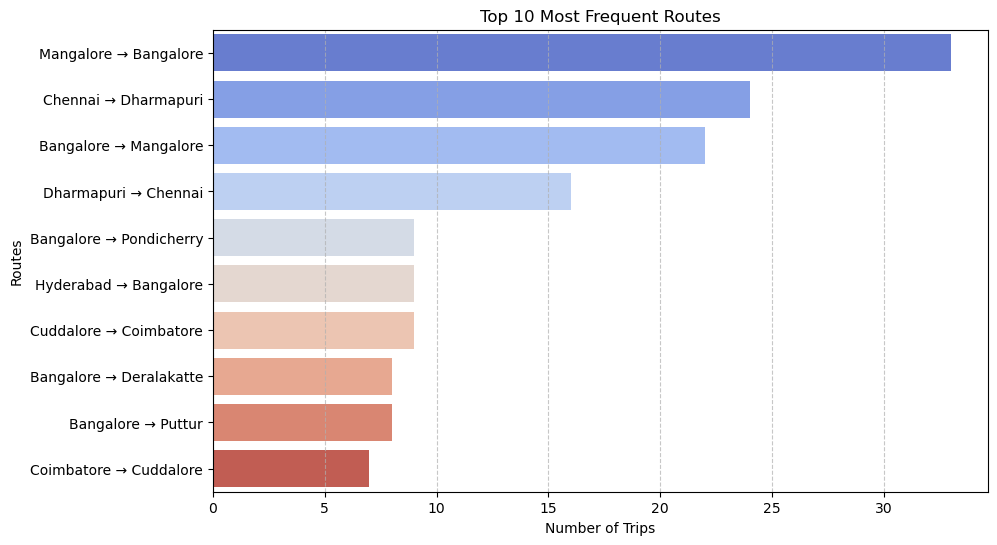

In [26]:
route_counts = df.groupby(['Origin', 'Destination']).size().reset_index(name='Count')
most_frequent_routess = route_counts.sort_values(by='Count', ascending=False).head(10)

# Create a new column for Route names
most_frequent_routess['Route'] = most_frequent_routess['Origin'] + " → " + most_frequent_routess['Destination']

# Sort in descending order so the top route is at the top
most_frequent_routess = most_frequent_routess.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Route', data=most_frequent_routess, palette='coolwarm')

# Labels and title
plt.xlabel('Number of Trips')
plt.ylabel('Routes')
plt.title('Top 10 Most Frequent Routes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


C:\Users\karkw\AppData\Local\Temp\ipykernel_14820\1841928417.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


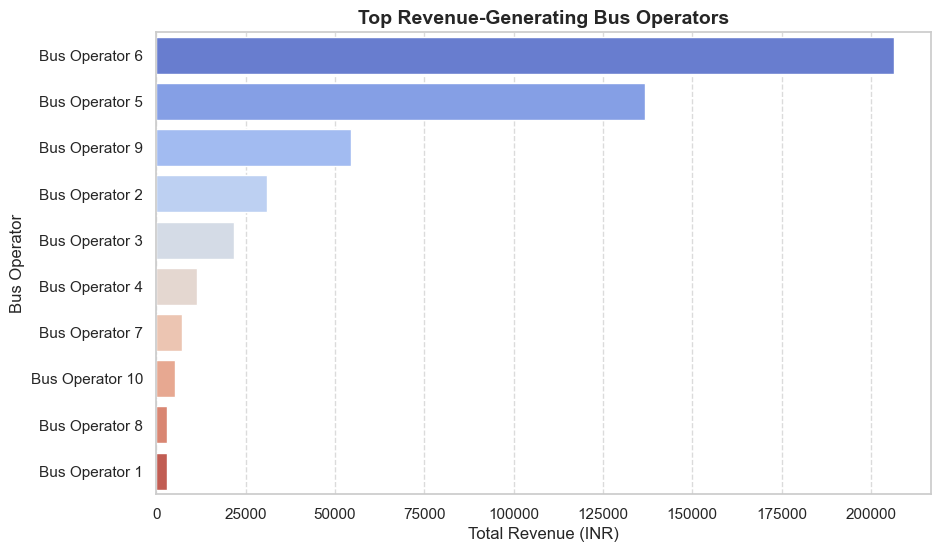

In [33]:
operator_revenue_sorted = most_profitable_operators.sort_values(by="Total Fare", ascending=False)

# Create figure
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
sns.barplot(
    x="Total Fare", 
    y="Bus Operator Name", 
    data=operator_revenue_sorted, 
    palette="coolwarm"
)

# Titles and labels
plt.xlabel("Total Revenue (INR)", fontsize=12)
plt.ylabel("Bus Operator", fontsize=12)
plt.title("Top Revenue-Generating Bus Operators", fontsize=14, fontweight="bold")

# Grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

C:\Users\karkw\AppData\Local\Temp\ipykernel_14820\3121036724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Bus Operator Name', y='Low Occupancy Count', data=underutilized_operators, palette='viridis')


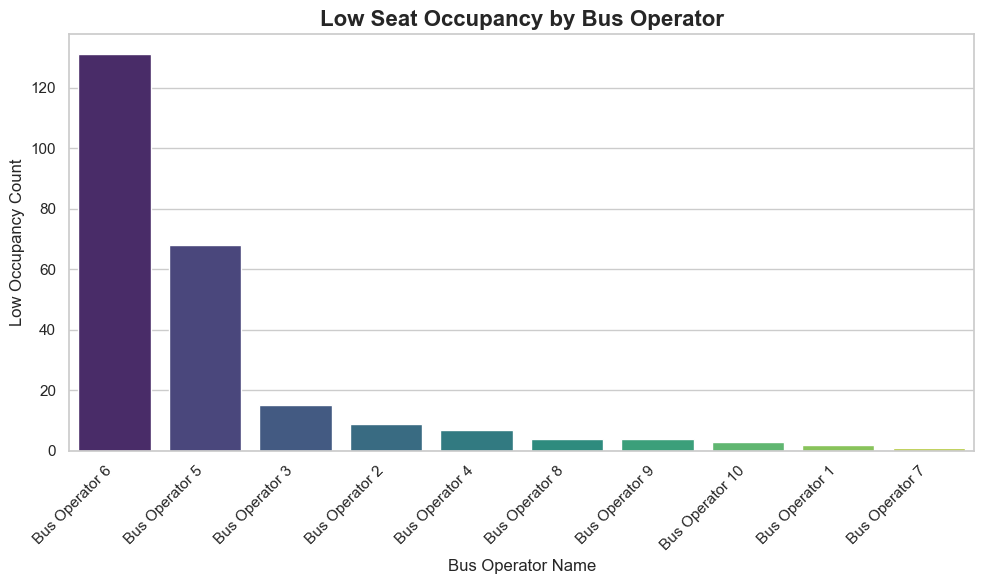

In [34]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Bus Operator Name', y='Low Occupancy Count', data=underutilized_operators, palette='viridis')

# Title and labels
plt.title('Low Seat Occupancy by Bus Operator', fontsize=16, fontweight='bold')
plt.xlabel('Bus Operator Name', fontsize=12)
plt.ylabel('Low Occupancy Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot with adjusted layout
plt.tight_layout()
plt.show()

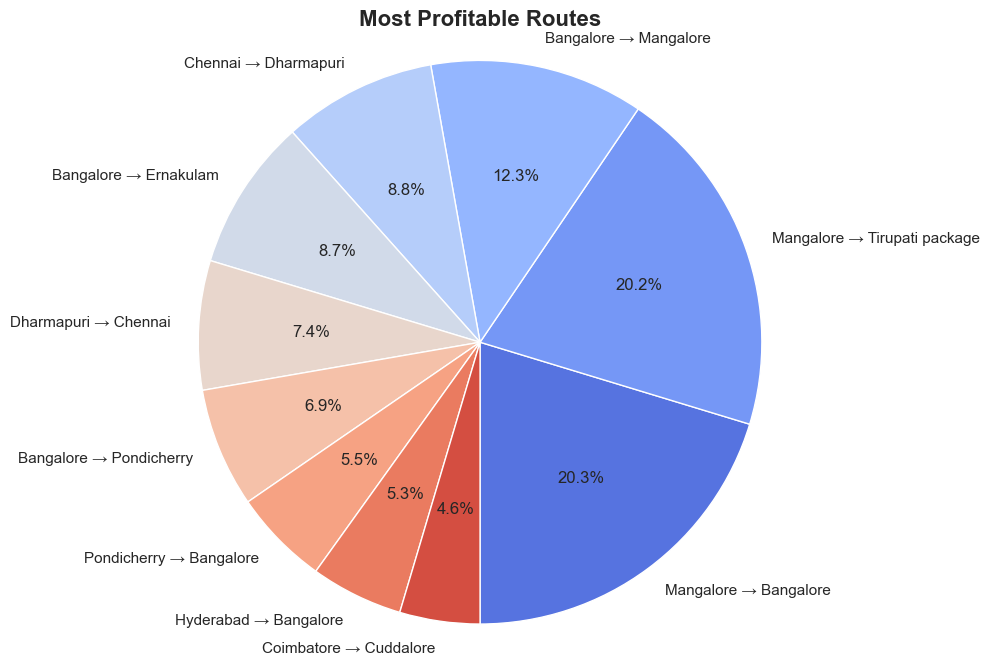

In [29]:

# Plotting the pie chart
plt.figure(figsize=(8, 8))

# Rotate the pie chart so the smallest segment is at the bottom
plt.pie(profitable_routes['Total Fare'], 
        labels=profitable_routes['Origin'] + ' → ' + profitable_routes['Destination'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette("coolwarm", len(profitable_routes)), 
        startangle=270)  # Rotate to start from the bottom

# Add title
plt.title('Most Profitable Routes', fontsize=16, fontweight='bold')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

Revenue with Discounts: 520702.5
Revenue without Discounts: 480653.44998914003


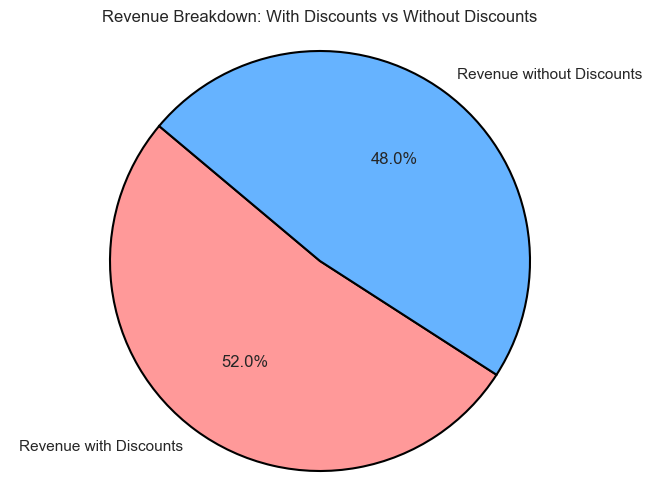

In [30]:
# Calculate Total Revenue with and without Discounts
revenue_with_discounts = df['Fare'].sum()  # Total fare before discount
revenue_without_discounts = df['Total Fare'].sum()  # Total fare after discount


# Print the total revenue with and without discounts
print(f"Revenue with Discounts: {revenue_with_discounts}")
print(f"Revenue without Discounts: {revenue_without_discounts}")

# Prepare data for the pie chart
revenue_data = [revenue_with_discounts, revenue_without_discounts]
labels = ['Revenue with Discounts', 'Revenue without Discounts']
colors = ['#ff9999', '#66b3ff']

# Plot aesthetic pie chart
plt.figure(figsize=(8, 6))
plt.pie(revenue_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title('Revenue Breakdown: With Discounts vs Without Discounts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()